# %% [markdown]
# # 1. EDA & Visualization
# - Load metadata
# - Analyze frame counts, motion features
# - Visualize samples

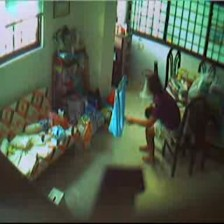

Video ID: Abuse027_x264
Label: Anomaly
Mean Motion: 0.63
Frame folders exist:
✅ Normal_Videos_312_x264: 1261 frames
✅ Normal_Videos_892_x264: 1770 frames
✅ Normal_Videos_938_x264: 4827 frames
✅ Abuse022_x264: 2832 frames
✅ Normal_Videos_345_x264: 209 frames
✅ Normal_Videos_129_x264: 467 frames
✅ Normal_Videos_884_x264: 9029 frames
✅ Normal_Videos_168_x264: 1740 frames
✅ Abuse034_x264: 1563 frames
✅ Normal_Videos_056_x264: 1572 frames
✅ Normal_Videos_778_x264: 1262 frames
✅ Abuse018_x264: 2428 frames
✅ Normal_Videos_902_x264: 1384 frames
✅ Normal_Videos_781_x264: 3975 frames
✅ Normal_Videos_914_x264: 880 frames
✅ Normal_Videos_943_x264: 1020 frames
✅ Normal_Videos_934_x264: 1765 frames
✅ Normal_Videos_871_x264: 4358 frames
✅ Normal_Videos_888_x264: 574 frames
✅ Abuse038_x264: 891 frames
✅ Normal_Videos_867_x264: 624 frames
✅ Normal_Videos_758_x264: 1589 frames
✅ Abuse043_x264: 3870 frames
✅ Abuse014_x264: 2590 frames
✅ Abuse002_x264: 865 frames
✅ Normal_Videos_365_x264: 6626 frames
✅ Ab

In [1]:
# %% [markdown]
# # 1. EDA & Visualization (Fixed Version)

# %%
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display
from pathlib import Path  # Better path handling

# %%
# Load metadata with absolute paths
base_dir = Path("..") / "/Users/Video anomaly/data/processed"  # Adjust if needed
df = pd.read_csv(base_dir / "metadata" / "video_metadata.csv")

# Convert paths to absolute
df['frames_dir'] = df['frames_dir'].apply(lambda x: base_dir / x)

# %%
def show_sample(video_id, frame_num=0):
    """Robust frame display function"""
    try:
        # Get the correct frames directory
        frames_dir = df[df['video_id'] == video_id]['frames_dir'].iloc[0]
        
        # Construct full path with zero-padding
        frame_path = frames_dir / f"frame_{frame_num:04d}.jpg"
        
        # Verify path exists
        if not frame_path.exists():
            raise FileNotFoundError(f"Frame not found: {frame_path}")
            
        # Display with correct orientation
        display(Image(filename=str(frame_path)))
        
        # Show metadata
        video_data = df[df['video_id'] == video_id].iloc[0]
        print(f"Video ID: {video_id}")
        print(f"Label: {'Anomaly' if video_data['label'] else 'Normal'}")
        print(f"Mean Motion: {video_data['mean_motion']:.2f}")
        
    except Exception as e:
        print(f"❌ Error showing sample: {e}")

# %%
# Test with the first available video
first_video = df.iloc[0]['video_id']
show_sample(first_video)  # Should work now

# %%
# Debug: List all frame folders (verify paths)
print("Frame folders exist:")
for folder in (base_dir / "frames").iterdir():
    if folder.is_dir():
        print(f"✅ {folder.name}: {len(list(folder.glob('*.jpg')))} frames")

Total Videos: 199
Anomaly Ratio: 24.62%



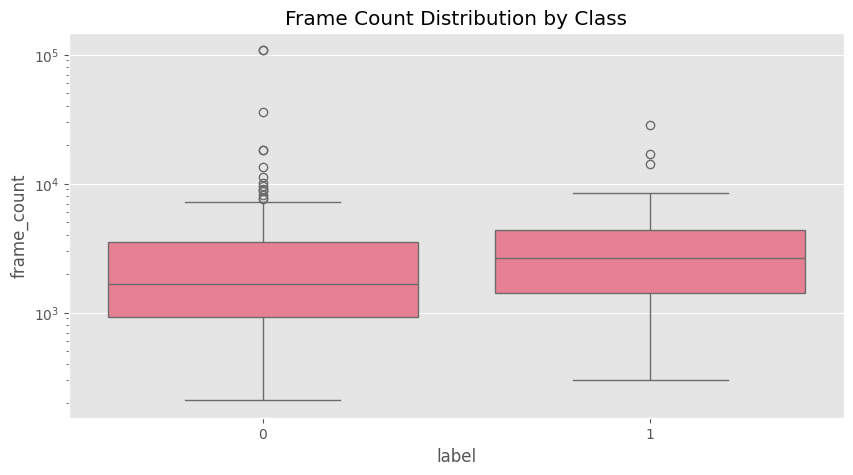

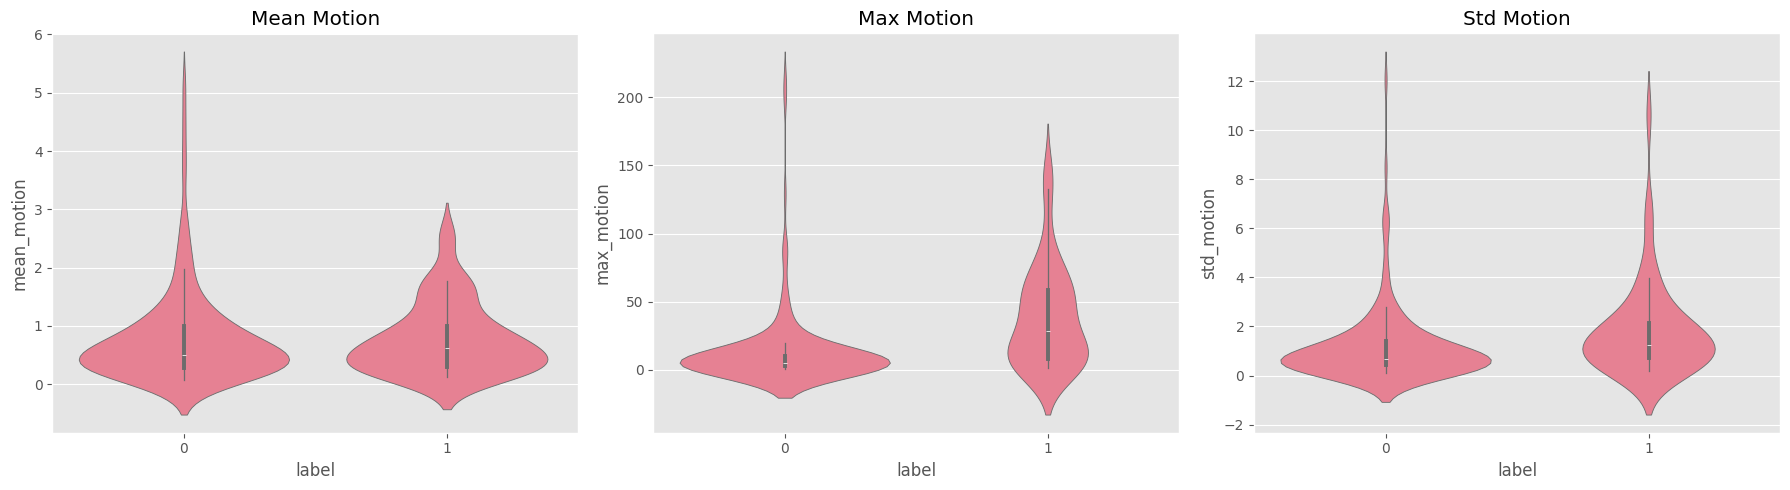

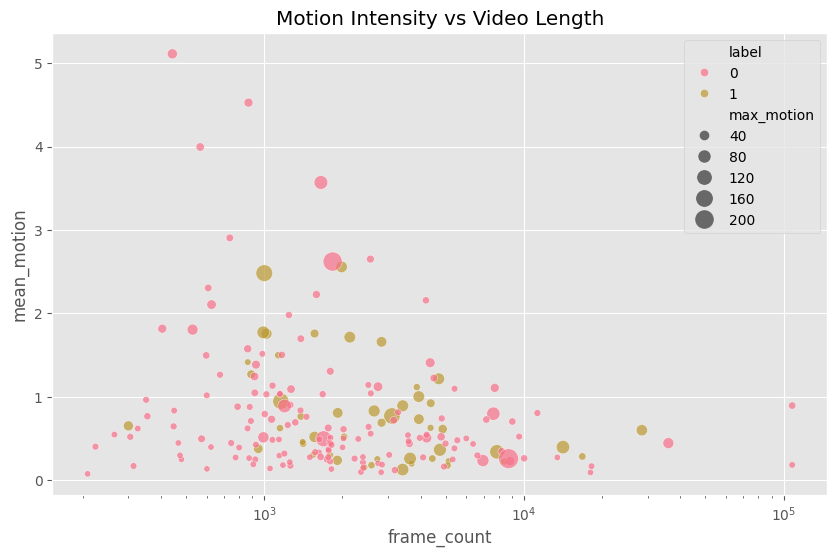

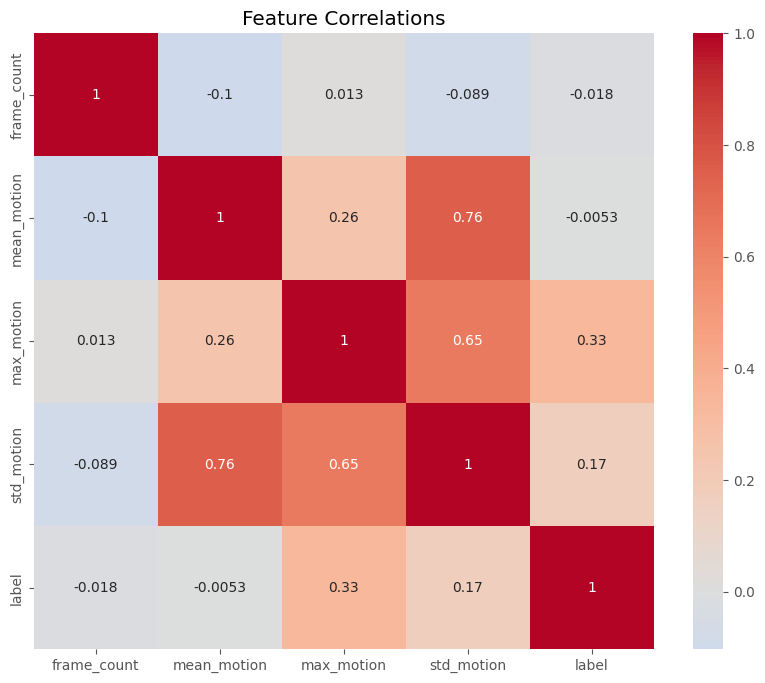

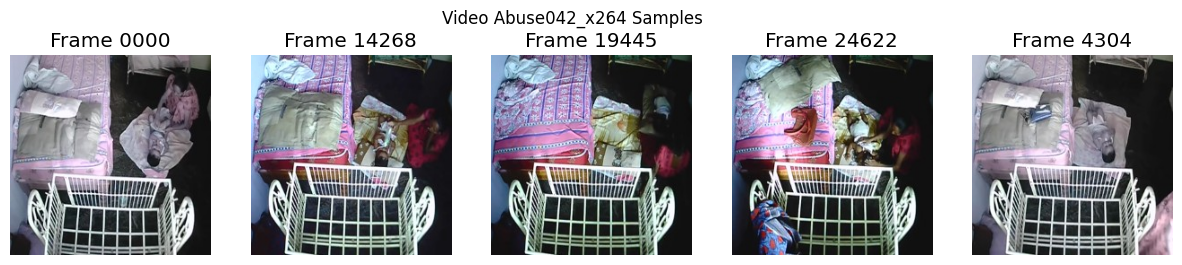

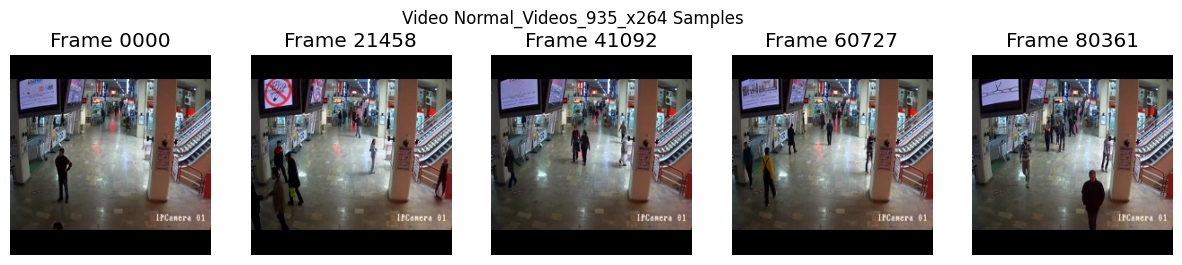

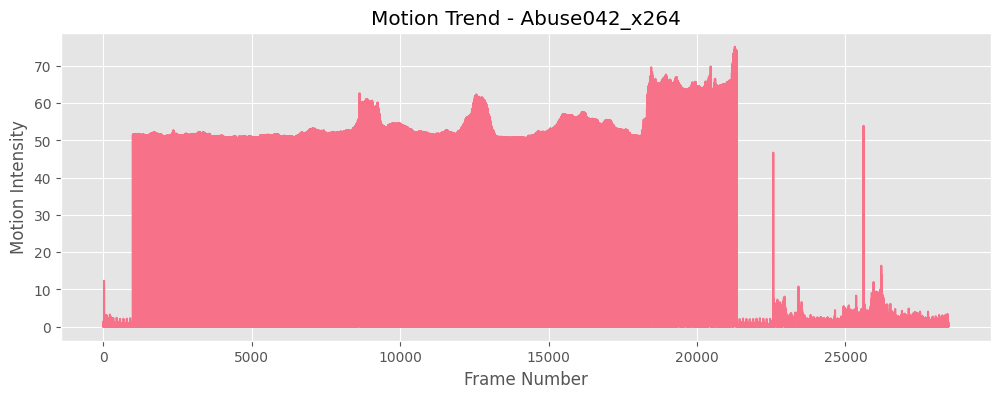

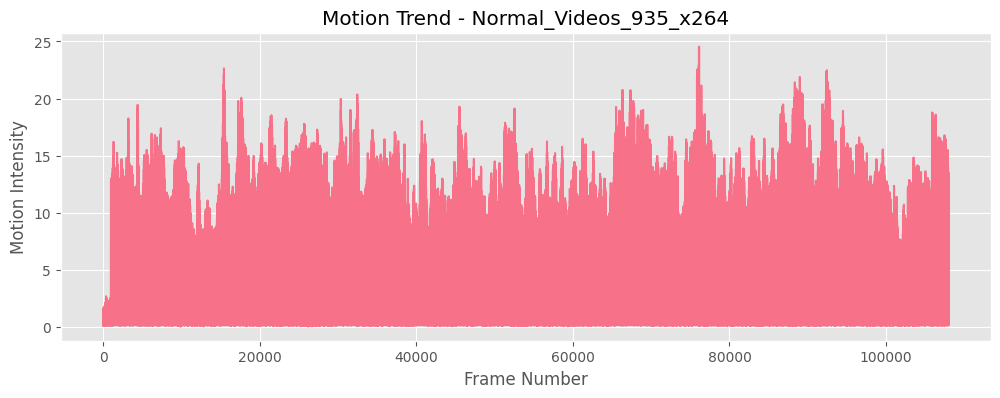

In [2]:
# %% [markdown]
# # Enhanced EDA for Video Anomaly Detection
# - Motion feature distributions
# - Frame count analysis
# - Sample visualizations

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image
from pathlib import Path
import cv2

# Set style
plt.style.use('ggplot')
sns.set_palette("husl")

# %%
# Load data with absolute paths
base_dir = Path("..") / "/Users/Video anomaly/data/processed"
df = pd.read_csv(base_dir / "metadata" / "video_metadata.csv")

# Convert paths
df['frames_dir'] = df['frames_dir'].apply(lambda x: base_dir / x)

# %% [markdown]
# ## 1. Dataset Overview

# %%
# Basic stats
print(f"Total Videos: {len(df)}")
print(f"Anomaly Ratio: {df['label'].mean():.2%}\n")

# Frame count comparison
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='frame_count', data=df)
plt.title("Frame Count Distribution by Class")
plt.yscale('log')  # Log scale for better visibility
plt.show()

# %%
# Motion features comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

features = ['mean_motion', 'max_motion', 'std_motion']
for ax, feat in zip(axes, features):
    sns.violinplot(x='label', y=feat, data=df, ax=ax)
    ax.set_title(f"{feat.replace('_', ' ').title()}")
    
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 2. Advanced Visualizations

# %%
# Motion vs Frame Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='frame_count', y='mean_motion', hue='label', 
                size='max_motion', sizes=(20, 200), alpha=0.7, data=df)
plt.title("Motion Intensity vs Video Length")
plt.xscale('log')
plt.show()

# %%
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[['frame_count', 'mean_motion', 'max_motion', 'std_motion', 'label']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlations")
plt.show()

# %% [markdown]
# ## 3. Frame Sampling & Visualization

# %%
def display_sample_frames(video_id, n_frames=5):
    """Display evenly spaced frames from a video"""
    try:
        frames_dir = df[df['video_id'] == video_id]['frames_dir'].iloc[0]
        frame_files = sorted(frames_dir.glob("*.jpg"))
        
        if not frame_files:
            print(f"No frames found in {frames_dir}")
            return
            
        # Select evenly spaced frames
        selected_frames = frame_files[::len(frame_files)//n_frames][:n_frames]
        
        plt.figure(figsize=(15, 3))
        for i, frame_path in enumerate(selected_frames):
            img = cv2.cvtColor(cv2.imread(str(frame_path)), cv2.COLOR_BGR2RGB)
            plt.subplot(1, n_frames, i+1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Frame {frame_path.stem.split('_')[-1]}")
        plt.suptitle(f"Video {video_id} Samples")
        plt.show()
        
    except Exception as e:
        print(f"Error displaying frames: {e}")

# %%
# Display samples from longest anomaly video
longest_anomaly = df[df['label']==1].sort_values('frame_count', ascending=False).iloc[0]['video_id']
display_sample_frames(longest_anomaly)

# Display samples from random normal video
random_normal = df[df['label']==0].sample(1).iloc[0]['video_id']
display_sample_frames(random_normal)

# %% [markdown]
# ## 4. Motion Patterns

# %%
def plot_motion_trend(video_id):
    """Plot motion intensity across frames for a video"""
    try:
        frames_dir = df[df['video_id'] == video_id]['frames_dir'].iloc[0]
        frame_files = sorted(frames_dir.glob("*.jpg"))
        
        if len(frame_files) < 2:
            print("Not enough frames for motion analysis")
            return
            
        # Calculate frame differences
        motions = []
        prev_frame = cv2.cvtColor(cv2.imread(str(frame_files[0])), cv2.COLOR_BGR2GRAY)
        
        for frame_path in frame_files[1:]:
            curr_frame = cv2.cvtColor(cv2.imread(str(frame_path)), cv2.COLOR_BGR2GRAY)
            motion = cv2.absdiff(curr_frame, prev_frame)
            motions.append(np.mean(motion))
            prev_frame = curr_frame
            
        plt.figure(figsize=(12, 4))
        plt.plot(motions)
        plt.title(f"Motion Trend - {video_id}")
        plt.xlabel("Frame Number")
        plt.ylabel("Motion Intensity")
        plt.show()
        
    except Exception as e:
        print(f"Error plotting motion: {e}")

# %%
# Plot motion trends
plot_motion_trend(longest_anomaly)
plot_motion_trend(random_normal)